# Exemplo de reamostragem das partículas

In [1]:
import numpy as np

import projeto_pf # Seu trabalho vai aqui
import inspercles
from pf import draw_random_sample

import sys
if (sys.version_info > (3, 0)):
    import importlib
    importlib.reload(projeto_pf) # Para garantir que o Jupyter sempre relê seu trabalho
else:
    reload(projeto_pf)

%matplotlib inline



Using scikit-learn to compute nearest neighbors


## Criação das partículas e do robô

In [2]:

particulas = projeto_pf.cria_particulas()
robot = projeto_pf.robot

    
    
    
    

## Mapa com posição inicial

Este desenho é só ilustrativo, você não vai precisar chamar o código de desenho no projeto. Somente precisa criar as funções adequadas em `projeto_pf.py`.

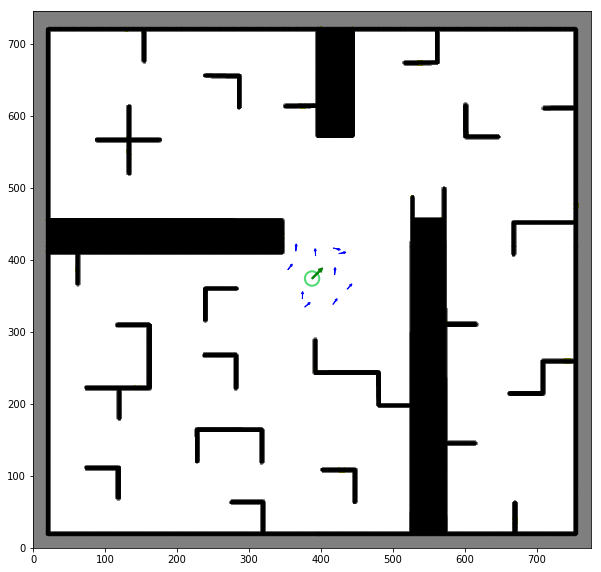

In [13]:
inspercles.nb_draw_map(inspercles.color_image, particles = particulas, pose=robot.pose(), robot=True)

Vamos tornar a distribuição de probabilidade nas partículas bem desequilibrada para observarmos a reamostragem

In [14]:
particulas[0].w = 0.8   # a primeira recebe 80% da probabilidade
for i in range(1, 10):
    particulas[i].w = 0.2/9.0 # As subsequentes 1/9 do que sobrou (20%)

In [15]:
# Vamos separar a informação de posição das partículas para que possamos "ver"  as partículas
particulas_exp = [[p.x, p.y, p.theta] for p in particulas]

particulas_pesos = [np.round(p.w, decimals=3) for p in particulas]

In [16]:
particulas_exp

[[364.9293043393905, 412.1543781891838, 1.5122041369729562],
 [418.9151377705091, 379.38725536985277, 1.513273336274509],
 [436.16138987637555, 359.1308792928741, 0.8390700316163795],
 [353.81307400221476, 386.27191549001003, 0.8940558902883833],
 [417.0566013383954, 416.2974544115228, -0.23360872987027217],
 [377.20493196550507, 334.32663834027414, 0.7016367642746606],
 [424.678830245713, 408.56406142105294, 0.19448883564974234],
 [416.45470667137454, 338.0238444181908, 0.9368161403353168],
 [392.4034792674133, 405.6021573590213, 1.634621108870405],
 [374.0533692235597, 345.88048405741904, 1.544755219568835]]

Vejam como está a distribuição dos pesos

In [17]:
particulas_pesos

[0.8, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022]

## Fazendo a reamostragem

Vamos criar novas partículas reamostrando usando a função `pf.draw_random_sample`

In [18]:
novas_particulas = draw_random_sample(particulas, particulas_pesos, 10)

A probabilidade que está em peso agora o sentido. Precisamos fazer com que todos os pesos novamente virem w=1  (ou $1/n$ como na folha de papel, tanto faz desde que todas fiquem iguais)

In [19]:
for p in novas_particulas:
    p.w = 1

O array *novas_particulas* contém as partículas depois da reamostragem. 

## Depois da reamostragem

Vamos observar os valores das partículas

In [20]:
valores_novas_particulas = [[p.x, p.y, p.theta] for p in novas_particulas]

Observem com a partícula que na geração anterior tinha $80\%$ de probabilidade é muito mais comum agora


**<font color=red>Note que para o projeto a partícula precisa sofrer uma pequena mutação</font>**

In [21]:
valores_novas_particulas

[[364.9293043393905, 412.1543781891838, 1.5122041369729562],
 [364.9293043393905, 412.1543781891838, 1.5122041369729562],
 [364.9293043393905, 412.1543781891838, 1.5122041369729562],
 [392.4034792674133, 405.6021573590213, 1.634621108870405],
 [417.0566013383954, 416.2974544115228, -0.23360872987027217],
 [392.4034792674133, 405.6021573590213, 1.634621108870405],
 [364.9293043393905, 412.1543781891838, 1.5122041369729562],
 [364.9293043393905, 412.1543781891838, 1.5122041369729562],
 [364.9293043393905, 412.1543781891838, 1.5122041369729562],
 [416.45470667137454, 338.0238444181908, 0.9368161403353168]]

![](animated.gif)